<a href="https://colab.research.google.com/github/syedaftab-dev/Machine-learning/blob/main/1_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regreesion


# New Section

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
from sklearn.datasets import make_classification # creates a dataset with standardaized data



In [41]:
# create the dataset
X,y = make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)
# n_samples -> no of rows ,n_clases->no of output caltegory,n_features ->independent features

In [42]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [44]:
# Model training
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()


In [45]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred = logistic.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [48]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



## Hyperparameter tunning and cross validation

In [49]:
model = LogisticRegression()


In [50]:
# parameter of logisticRegression()

penalty = ['l1','l2','elasticnet'] # a parameter
c_val = [100,10,1.0,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

In [51]:
# we have to put all that parameter as key value pairs

params = dict(penalty=penalty,C=c_val,solver=solver)

## GRID Seach CV


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()

grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

# parameters here -> estimator->model we r using
# param_grid -> parameter we made in above cell
# scoring -> scoring value (metrics like accuracy,precision,recall)
# cv

grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [53]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [54]:
grid.best_params_
# automatically takes best parameter best for the model

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [55]:
grid.best_score_

np.float64(0.8785714285714287)

In [56]:
y_pred = grid.predict(X_test)

In [57]:
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8533333333333334
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       157
           1       0.80      0.92      0.86       143

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

[[124  33]
 [ 11 132]]


Randomized SearchCV -> another hyperma

In [58]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()

randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,cv=5)

randomcv.fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [59]:
randomcv.best_score_

np.float64(0.8785714285714287)

In [60]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.01}

In [61]:
ypred = randomcv.predict(X_test
                         )

In [62]:
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8533333333333334
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       157
           1       0.80      0.92      0.86       143

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

[[124  33]
 [ 11 132]]


# Logistic Regression for MultiClass classification problem

In [63]:
X,y = make_classification(n_samples=1000,n_features=10,n_classes=3,n_informative=3,random_state=42)


In [64]:
X

array([[ 0.7715326 , -1.47433614,  2.19664605, ...,  0.68174341,
         1.08996189,  0.96250289],
       [ 1.85838284, -3.68087983,  0.22749588, ..., -0.47417818,
         1.34113888, -0.77177196],
       [-0.98724764,  1.53916836,  0.5859042 , ..., -0.32202815,
        -1.45103394,  1.32543211],
       ...,
       [-1.227082  ,  1.65602784,  0.47263035, ..., -0.8634936 ,
        -1.83932326, -0.03120349],
       [ 1.28527572, -0.29715202, -0.67172079, ..., -1.31544131,
         2.85446468,  1.3094441 ],
       [-0.75428048,  0.88516075, -1.6728939 , ..., -2.0362205 ,
        -1.43989584,  0.04749347]])

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.model_selection import LogisticRegression
logistic = LogisticRegression(multiclass="ovr")
# a important parameter ovr -> one verses rest ,based on no of categories that many no of model are created internally

In [76]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [77]:
y_pred = logistic.predict(X_test)

In [78]:
y_pred

array([2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2,
       1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1])

In [82]:
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7033333333333334
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       103
           1       0.50      0.60      0.55        80
           2       0.86      0.74      0.80       117

    accuracy                           0.70       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.72      0.70      0.71       300

[[76 25  2]
 [20 48 12]
 [ 7 23 87]]


In [83]:
# we can improve the aaccuracy by using hyper parametere tuning

# Logistic Regresssion for imbalanced Dataset

In [84]:

# generate and plot a syntheric imbalnce classification dataset

from collections import Counter
from sklearn.datasets import make_classification

In [85]:
# imbalance dataset

X,y=make_classification(n_samples=1000,n_classes=2,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

# n_cluster_per_class -> no of groups
# wieght -> we can create an imbalanced dataset


In [86]:
X

array([[ 1.45122049, -1.08670474],
       [ 2.08029047, -0.97808443],
       [ 1.91805213, -1.0431487 ],
       ...,
       [ 0.83675119, -0.54161851],
       [ 0.45782986, -1.05177133],
       [ 0.27891721, -1.16309231]])

In [87]:
Counter(y) # no of 1s and 0s

Counter({np.int64(0): 985, np.int64(1): 15})

In [88]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

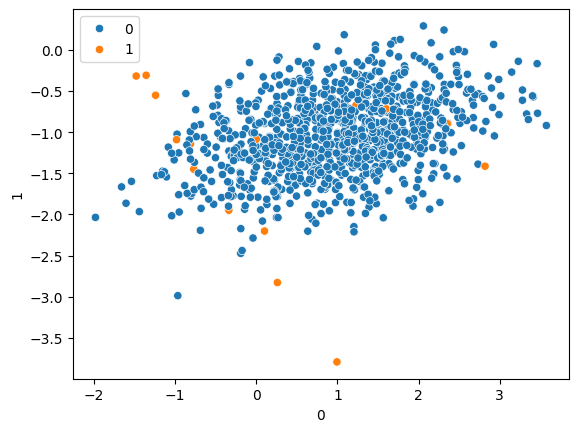

In [89]:
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.model_selection import LogisticRegression
model = LogisticRegression()


In [93]:
# hyperparameter tuning

penalty = ['l1','l2','elasticnet']
c_values=[100,10,1.0,0.01]
solver = ['newton-cg','lbfgs','linlinear','sag','saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [101]:
param = dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [102]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [104]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',cv=cv)

In [105]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'linlinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [106]:
grid.best_params_
# 1 is given more imoprtance

{'C': 100, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'saga'}

In [108]:
y_predict = grid.predict(X_test)

In [109]:
score = accuracy_score(y_predict,y_test)
print(score)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_predict,y_test))

0.976
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       244
           1       0.00      0.00      0.00         6

    accuracy                           0.98       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.95      0.98      0.96       250

[[244   6]
 [  0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
